In [66]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

In [67]:
data0 = pd.read_csv('combined_features.csv')
data0.head()

,Domain,Having_IP,Have_At_Sign,URL_Length,URL_Depth,Redirection,HTTP_Domain,Tiny_URL,Prefix_Suffix,Iframe,Mouse_Over,Right_Click,Forwarding,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,0,1,0,benign
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,0,1,0,benign
2,hubpages.com,0,0,1,1,0,0,0,0,0,0,1,0,benign
3,extratorrent.cc,0,0,1,3,0,0,0,0,1,1,1,1,benign
4,icicibank.com,0,0,1,3,0,0,0,0,0,0,1,1,benign


In [68]:
data0.shape

(15166, 14)

In [69]:
data0.columns

Index(['Domain', 'Having_IP', 'Have_At_Sign', 'URL_Length', 'URL_Depth',
       'Redirection', 'HTTP_Domain', 'Tiny_URL', 'Prefix_Suffix', 'Iframe',
       'Mouse_Over', 'Right_Click', 'Forwarding', 'Label'],
      dtype='object')

In [70]:
data0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15166 entries, 0 to 15165
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         15166 non-null  object
 1   Having_IP      15166 non-null  int64 
 2   Have_At_Sign   15166 non-null  int64 
 3   URL_Length     15166 non-null  int64 
 4   URL_Depth      15166 non-null  int64 
 5   Redirection    15166 non-null  int64 
 6   HTTP_Domain    15166 non-null  int64 
 7   Tiny_URL       15166 non-null  int64 
 8   Prefix_Suffix  15166 non-null  int64 
 9   Iframe         15166 non-null  int64 
 10  Mouse_Over     15166 non-null  int64 
 11  Right_Click    15166 non-null  int64 
 12  Forwarding     15166 non-null  int64 
 13  Label          15166 non-null  object
dtypes: int64(12), object(2)
memory usage: 1.6+ MB


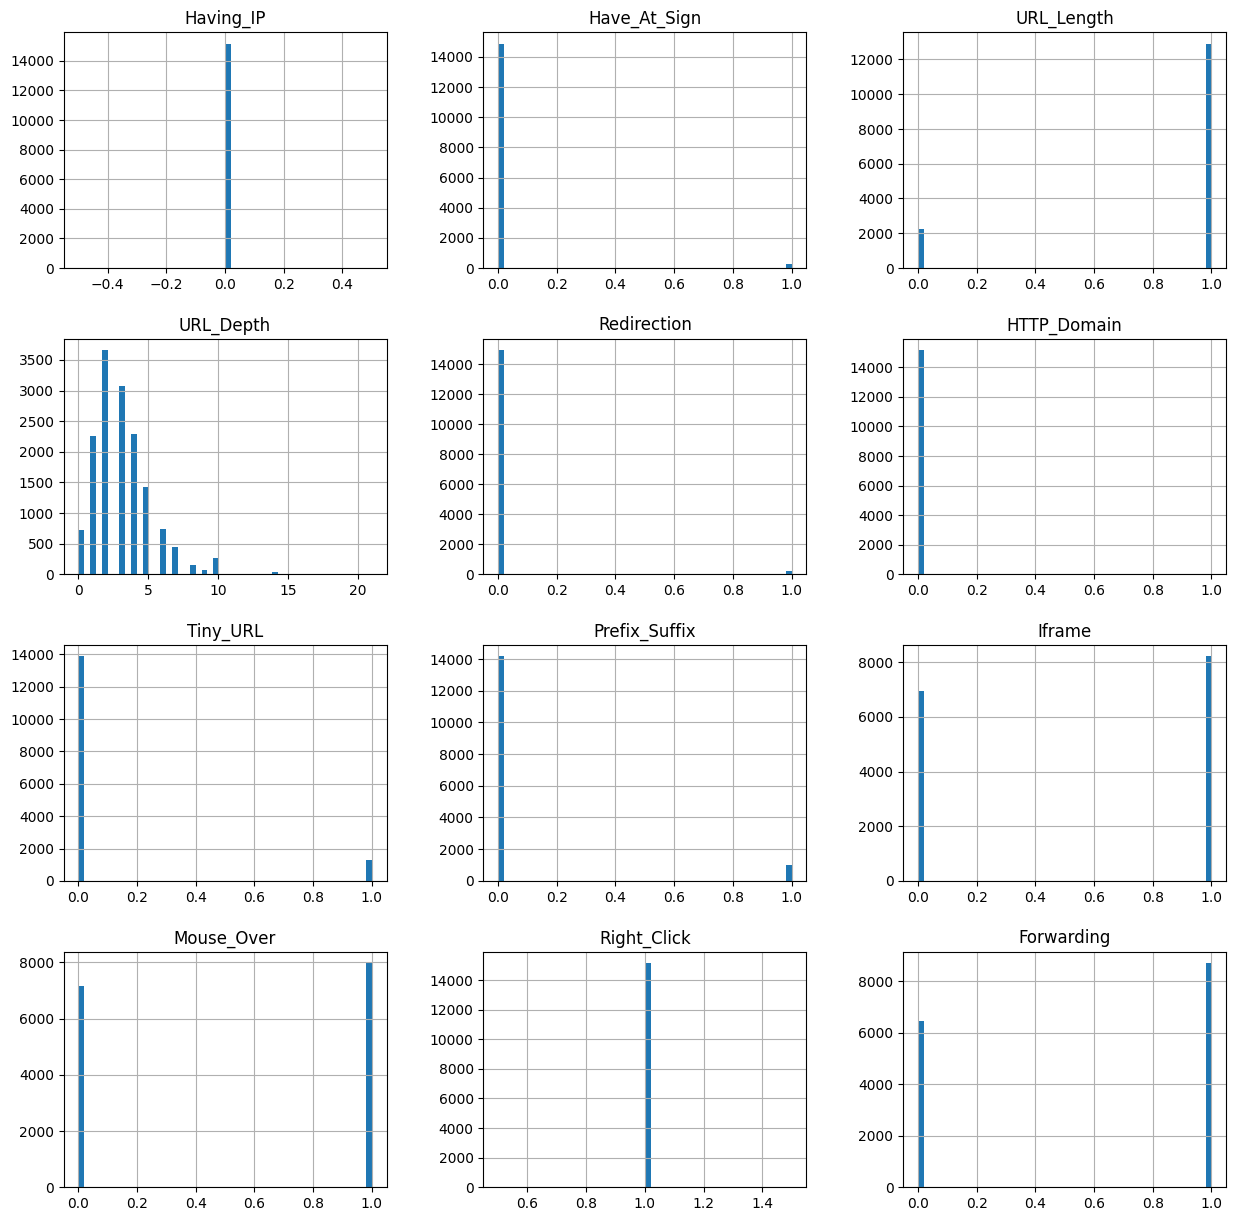

In [ ]:
#visualize the data distribution
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [72]:
data0.describe()

,Having_IP,Have_At_Sign,URL_Length,URL_Depth,Redirection,HTTP_Domain,Tiny_URL,Prefix_Suffix,Iframe,Mouse_Over,Right_Click,Forwarding
count,15166.0,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.000000,15166.0,15166.000000
mean,0.0,0.018396,0.851840,3.162007,0.012990,0.000198,0.084597,0.065739,0.541606,0.526704,1.0,0.573915
std,0.0,0.134384,0.355271,2.096501,0.113233,0.014064,0.278290,0.247834,0.498282,0.499303,0.0,0.494523
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.0,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
50%,0.0,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000
75%,0.0,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000
max,0.0,1.000000,1.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [73]:
#Dropping the Domain column
data = data0.drop(['Domain'], axis = 1).copy()

In [74]:
data.head()

,Having_IP,Have_At_Sign,URL_Length,URL_Depth,Redirection,HTTP_Domain,Tiny_URL,Prefix_Suffix,Iframe,Mouse_Over,Right_Click,Forwarding,Label
0,0,0,1,1,0,0,0,0,0,0,1,0,benign
1,0,0,1,1,1,0,0,0,0,0,1,0,benign
2,0,0,1,1,0,0,0,0,0,0,1,0,benign
3,0,0,1,3,0,0,0,0,1,1,1,1,benign
4,0,0,1,3,0,0,0,0,0,0,1,1,benign


In [75]:
data.columns

Index(['Having_IP', 'Have_At_Sign', 'URL_Length', 'URL_Depth', 'Redirection',
       'HTTP_Domain', 'Tiny_URL', 'Prefix_Suffix', 'Iframe', 'Mouse_Over',
       'Right_Click', 'Forwarding', 'Label'],
      dtype='object')

In [76]:
#checking the data for null or missing values
data.isnull().sum()

Having_IP        0
Have_At_Sign     0
URL_Length       0
URL_Depth        0
Redirection      0
HTTP_Domain      0
Tiny_URL         0
Prefix_Suffix    0
Iframe           0
Mouse_Over       0
Right_Click      0
Forwarding       0
Label            0
dtype: int64

In [77]:
data.head(10)

,Having_IP,Have_At_Sign,URL_Length,URL_Depth,Redirection,HTTP_Domain,Tiny_URL,Prefix_Suffix,Iframe,Mouse_Over,Right_Click,Forwarding,Label
0,0,0,1,1,0,0,0,0,0,0,1,0,benign
1,0,0,1,1,1,0,0,0,0,0,1,0,benign
2,0,0,1,1,0,0,0,0,0,0,1,0,benign
3,0,0,1,3,0,0,0,0,1,1,1,1,benign
4,0,0,1,3,0,0,0,0,0,0,1,1,benign
5,0,0,1,4,0,0,1,0,1,0,1,0,benign
6,0,0,1,2,0,0,0,0,0,0,1,0,benign
7,0,0,1,6,0,0,0,0,0,0,1,0,benign
8,0,0,1,2,0,0,0,0,1,1,1,1,benign
9,0,0,1,5,0,0,0,0,0,0,1,0,benign


#### SEE THE COUNT OF EACH CATEGORY

In [79]:
label_counts = data['Label'].value_counts()

# Print the counts
print("Label counts:")
print(label_counts)

# If labels are textual, add clarity
if 'phishing' in label_counts.index:
    print(f"\nNumber of phishing URLs: {label_counts['phishing']}")
if 'benign' in label_counts.index:
    print(f"Number of benign URLs: {label_counts['benign']}")

Label counts:
Label
benign      10166
phishing     5000
Name: count, dtype: int64

Number of phishing URLs: 5000
Number of benign URLs: 10166


In [84]:
data.columns

Index(['Having_IP', 'Have_At_Sign', 'URL_Length', 'URL_Depth', 'Redirection',
       'HTTP_Domain', 'Tiny_URL', 'Prefix_Suffix', 'Iframe', 'Mouse_Over',
       'Right_Click', 'Forwarding', 'Label'],
      dtype='object')

In [83]:
data['Label'].unique()

array(['benign', 'phishing'], dtype=object)

##### Change labels to 0 and 1 
0 for benign & 1 for phishing

In [85]:
# Map labels to numeric values
data['Label'] = data['Label'].map({'benign': 0, 'phishing': 1})

In [86]:
data.head(10)

,Having_IP,Have_At_Sign,URL_Length,URL_Depth,Redirection,HTTP_Domain,Tiny_URL,Prefix_Suffix,Iframe,Mouse_Over,Right_Click,Forwarding,Label
0,0,0,1,1,0,0,0,0,0,0,1,0,0
1,0,0,1,1,1,0,0,0,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,1,0,0
3,0,0,1,3,0,0,0,0,1,1,1,1,0
4,0,0,1,3,0,0,0,0,0,0,1,1,0
5,0,0,1,4,0,0,1,0,1,0,1,0,0
6,0,0,1,2,0,0,0,0,0,0,1,0,0
7,0,0,1,6,0,0,0,0,0,0,1,0,0
8,0,0,1,2,0,0,0,0,1,1,1,1,0
9,0,0,1,5,0,0,0,0,0,0,1,0,0


In [87]:
data.columns

Index(['Having_IP', 'Have_At_Sign', 'URL_Length', 'URL_Depth', 'Redirection',
       'HTTP_Domain', 'Tiny_URL', 'Prefix_Suffix', 'Iframe', 'Mouse_Over',
       'Right_Click', 'Forwarding', 'Label'],
      dtype='object')

In [88]:
data['Label'].unique()

array([0, 1])

#### Balance the dataset by random sampling of 5000 samples of each class

In [ ]:
# Separate the classes
benign = data[data['Label'] == 0]
phishing = data[data['Label'] == 1]

print("Total rows in benign dataset:", benign.shape[0])
print("Total rows in phishing dataset:", phishing.shape[0])

if benign.empty:
    print("Benign dataset is empty!")
else:
    print("Benign dataset contains", benign.shape[0], "entries.")

print(data['Label'].value_counts())

# random sampling to make benign and phishing counts equal
benign_sampled = benign.sample(n=5000, random_state=42) 
phishing_sampled = phishing  # all phishing URLs (already 5000)

balanced_data = pd.concat([benign_sampled, phishing_sampled], ignore_index=True)

# shuffle the dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# balanced dataset as a csv 
balanced_data.to_csv("balanced_features.csv", index=False)

# label count
print(balanced_data['Label'].value_counts())

Total rows in benign dataset: 10166
Total rows in phishing dataset: 5000
Benign dataset contains 10166 entries.
Label
0    10166
1     5000
Name: count, dtype: int64
Label
1    5000
0    5000
Name: count, dtype: int64


### Visualize the balanced dataset:

In [90]:
balanced_data = pd.read_csv('balanced_features.csv')
balanced_data.head(10)

,Having_IP,Have_At_Sign,URL_Length,URL_Depth,Redirection,HTTP_Domain,Tiny_URL,Prefix_Suffix,Iframe,Mouse_Over,Right_Click,Forwarding,Label
0,0,0,1,3,0,0,0,0,1,1,1,1,1
1,0,0,1,5,0,0,0,0,0,0,1,0,0
2,0,0,1,2,0,0,0,0,1,1,1,1,0
3,0,0,1,2,0,0,0,0,0,0,1,0,0
4,0,0,1,2,0,0,0,0,1,1,1,1,0
5,0,0,0,1,0,0,0,0,1,1,1,1,1
6,0,0,1,2,0,0,0,0,1,1,1,1,0
7,0,0,1,3,0,0,0,0,1,1,1,1,1
8,0,0,1,2,0,0,1,0,1,1,1,1,1
9,0,0,1,2,0,0,0,0,1,1,1,1,0


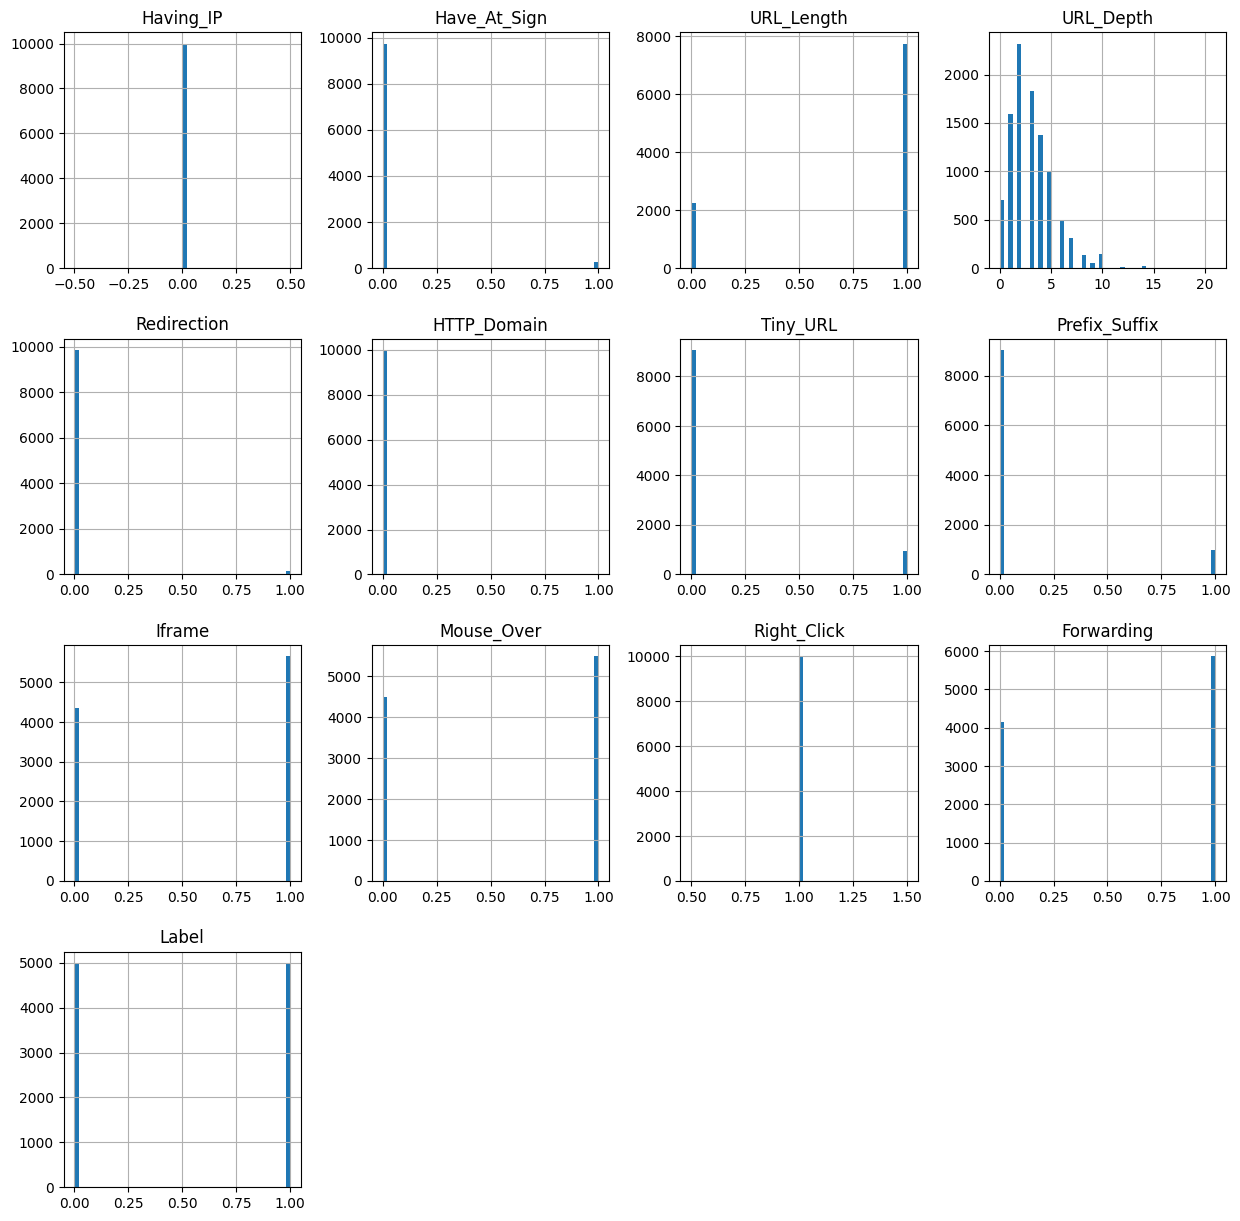

In [91]:
#Plotting the data distribution
balanced_data.hist(bins = 50,figsize = (15,15))
plt.show()

In [92]:
balanced_data.columns

Index(['Having_IP', 'Have_At_Sign', 'URL_Length', 'URL_Depth', 'Redirection',
       'HTTP_Domain', 'Tiny_URL', 'Prefix_Suffix', 'Iframe', 'Mouse_Over',
       'Right_Click', 'Forwarding', 'Label'],
      dtype='object')

In [93]:
balanced_data.shape

(10000, 13)

In [94]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
balanced_data = balanced_data.sample(frac=1).reset_index(drop=True)
balanced_data.head()

,Having_IP,Have_At_Sign,URL_Length,URL_Depth,Redirection,HTTP_Domain,Tiny_URL,Prefix_Suffix,Iframe,Mouse_Over,Right_Click,Forwarding,Label
0,0,0,1,2,0,0,0,0,1,1,1,1,0
1,0,0,0,0,0,0,0,1,1,1,1,1,1
2,0,0,1,5,0,0,1,0,0,0,1,0,1
3,0,0,1,6,0,0,0,0,1,1,1,1,0
4,0,0,0,1,0,0,0,0,1,1,1,1,1


From the above, it is clear that the data doesn't have any missing values.

Now, the data is throughly preprocessed & is ready for training.

### Train-Test Split

In [95]:
# Separate features and target
X = balanced_data.drop('Label', axis=1)  # Features
y = balanced_data['Label']              # Target

X.shape, y.shape

((10000, 12), (10000,))

In [96]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% - testing, 80% - training
    random_state=42,  # For reproducibility
    stratify=y  # Maintain class distribution
)

X_train.shape, X_test.shape

((8000, 12), (2000, 12))

Because this is a supervised machine learning task. There are two major types: classification and regression. This comes under classification problem, as the input URL is classified as phishing (1) or legitimate (0). The supervised machine learning models (classification) considered to train the dataset in here are:
* Decision Tree
* Random Forest
* Multilayer Perceptrons
* SVM
* XGBoost
* Autoencoder Neural Network


In [ ]:
# to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

#### Training: Decision Tree

In [98]:
# def train_decision_tree(X_train, y_train, max_depth=5, random_state=42):
#     model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
#     model.fit(X_train, y_train)
#     return model
    

In [99]:
# def predict_decision_tree(model, X_test) # X_test, y_test 
#     return model.predict(X_test)

In [100]:
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)

# Fit the model to the training data
tree_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [101]:
# Predicting on both training and testing data
y_train_pred = tree_model.predict(X_train)
y_test_pred = tree_model.predict(X_test)


In [102]:
# Evaluate on Training Data
accuracy_train_tree = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {accuracy_train_tree:.3f}")

# Evaluate on Testing Data
accuracy_test_tree = accuracy_score(y_test, y_test_pred)
print(f"Testing Accuracy: {accuracy_test_tree:.3f}")


Training Accuracy: 0.805
Testing Accuracy: 0.795


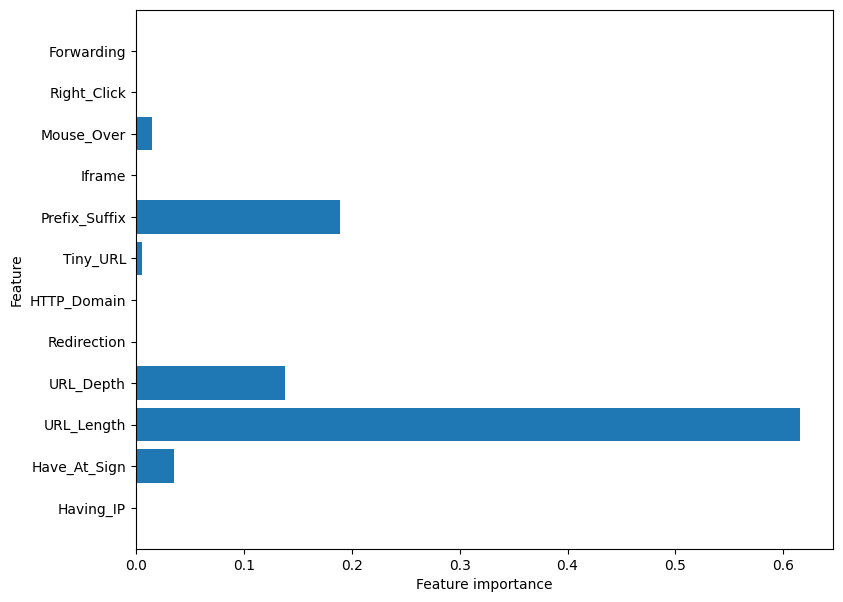

In [103]:
# Visualizing Feature Importance
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree_model.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [104]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', accuracy_train_tree, accuracy_test_tree)

#### Training: Random Forest

In [105]:
# def train_random_forest(X_train, y_train, X_test, y_test):
#     model = RandomForestClassifier(random_state=42)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print("Random Forest Report:")
#     print(classification_report(y_test, y_pred))
#     return accuracy_score(y_test, y_pred)


In [106]:
# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [107]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [108]:
#computing the accuracy of the model performance
accuracy_train_forest = accuracy_score(y_train,y_train_forest)
accuracy_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(accuracy_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(accuracy_test_forest))

Random forest: Accuracy on training Data: 0.796
Random forest: Accuracy on test Data: 0.788


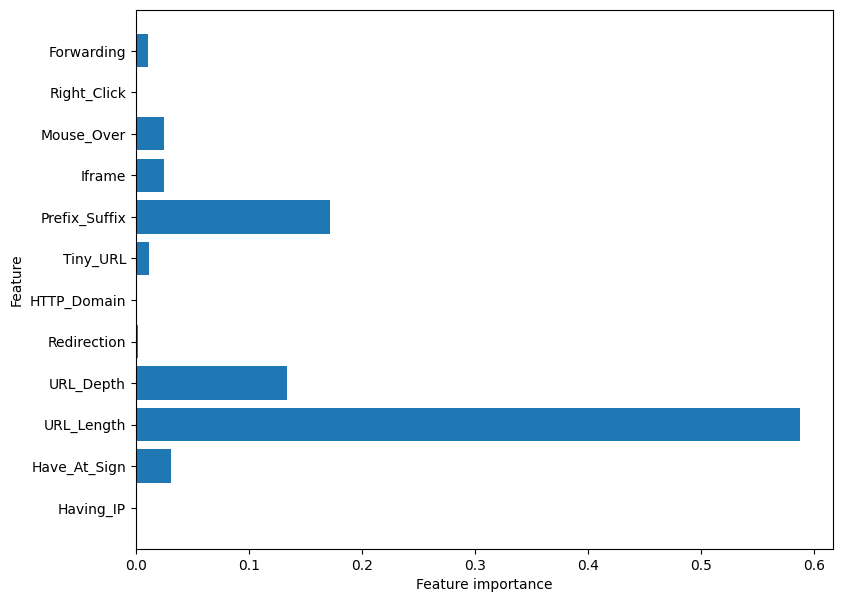

In [109]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [110]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', accuracy_train_forest, accuracy_test_forest)

#### Training: MLP (Multilevel Perceptrons) - Deep Learning

In [111]:
# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [112]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [113]:
#computing the accuracy of the model performance
accuracy_train_mlp = accuracy_score(y_train,y_train_mlp)
accuracy_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(accuracy_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(accuracy_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.828
Multilayer Perceptrons: Accuracy on test Data: 0.817


In [114]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', accuracy_train_mlp, accuracy_test_mlp)

#### Training: SVM

In [115]:
# def train_svm(X_train, y_train, X_test, y_test):
#     model = SVC(probability=True, random_state=42)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print("SVM Report:")
#     print(classification_report(y_test, y_pred))
#     return accuracy_score(y_test, y_pred)

In [116]:
# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [117]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [118]:
#computing the accuracy of the model performance
accuracy_train_svm = accuracy_score(y_train,y_train_svm)
accuracy_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(accuracy_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(accuracy_test_svm))

SVM: Accuracy on training Data: 0.794
SVM : Accuracy on test Data: 0.788


In [119]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', accuracy_train_svm, accuracy_test_svm)

#### Training: XG_boost

In [120]:
# def train_xgboost(X_train, y_train, X_test, y_test):
#     model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     print("XGBoost Report:")
#     print(classification_report(y_test, y_pred))
#     return accuracy_score(y_test, y_pred)

In [121]:
# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)

#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [122]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [123]:
#computing the accuracy of the model performance
accuracy_train_xgb = accuracy_score(y_train,y_train_xgb)
accuracy_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(accuracy_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(accuracy_test_xgb))

XGBoost: Accuracy on training Data: 0.832
XGBoost : Accuracy on test Data: 0.820


In [124]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', accuracy_train_xgb, accuracy_test_xgb)

#### Training - Autoencoder Neural Networks

In [127]:
import keras
from keras.layers import Input, Dense
from keras import regularizers
import tensorflow as tf
from keras.models import Model
from sklearn import metrics

In [ ]:
# building autoencoder model

input_dim = X_train.shape[1]
encoding_dim = input_dim

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="relu",
                activity_regularizer=regularizers.l1(10e-4))(input_layer)
encoder = Dense(int(encoding_dim), activation="relu")(encoder)

encoder = Dense(int(encoding_dim-2), activation="relu")(encoder)
code = Dense(int(encoding_dim-4), activation='relu')(encoder)
decoder = Dense(int(encoding_dim-2), activation='relu')(code)

decoder = Dense(int(encoding_dim), activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 12)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 12)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 12)             │           156 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 730 (2.85 KB)

 Trainable params: 730 (2.85 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#compiling the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train model
history = autoencoder.fit(X_train, X_train, epochs=10, batch_size=64, shuffle=True, validation_split=0.2) 

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0137 - loss: 3.3583 - val_accuracy: 0.3313 - val_loss: 0.8962
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7086 - loss: 0.5022 - val_accuracy: 0.8544 - val_loss: 0.1065
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8435 - loss: 0.1177 - val_accuracy: 0.8544 - val_loss: 0.0599
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8424 - loss: 0.0808 - val_accuracy: 0.8544 - val_loss: 0.0261
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8376 - loss: 0.0951 - val_accuracy: 0.8544 - val_loss: -0.0083
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8358 - loss: 0.0473 - val_accuracy: 0.8544 - val_loss: -0.0506
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8487 - loss: -0.0593 - val_accuracy: 0.8631 - val_loss: -0.1779
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8491 - loss: -0.1744 - val_accurac

In [130]:
accuracy_train_auto = autoencoder.evaluate(X_train, X_train)[1]
accuracy_test_auto = autoencoder.evaluate(X_test, X_test)[1]

print('\nAutoencoder: Accuracy on training Data: {:.3f}' .format(accuracy_train_auto))
print('Autoencoder: Accuracy on test Data: {:.3f}' .format(accuracy_test_auto))

250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 558us/step - accuracy: 0.5612 - loss: -1.6489
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - accuracy: 0.5629 - loss: -1.7154

Autoencoder: Accuracy on training Data: 0.559
Autoencoder: Accuracy on test Data: 0.557


In [131]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('AutoEncoder', accuracy_train_auto, accuracy_test_auto)

### VISUALIZATION

In [132]:
def visualize_results(results):
    models = list(results.keys())
    accuracies = list(results.values())
    
    plt.figure(figsize=(10, 6))
    plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'])
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.title('Model Accuracy Comparison')
    plt.show()

#### Comparsion of different models 

In [ ]:
#create dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.805,0.795
1,Random Forest,0.796,0.788
2,Multilayer Perceptrons,0.828,0.817
3,SVM,0.794,0.788
4,XGBoost,0.832,0.820
5,AutoEncoder,0.559,0.557


In [135]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
4,XGBoost,0.832,0.820
2,Multilayer Perceptrons,0.828,0.817
0,Decision Tree,0.805,0.795
1,Random Forest,0.796,0.788
3,SVM,0.794,0.788
5,AutoEncoder,0.559,0.557


#### Save the best performing model 
    As a pickle file (for using in deployment using Flask)

In [3]:
import pickle
pickle.dump(xgb, open("./models/xgboost.pickle.dat", "wb")) #rename

NameError: name 'xgb' is not defined

##### Test the save model

In [4]:
# load model from file
import pickle

loaded_model = pickle.load(open("./models/xgboost.pickle.dat", "rb")) #rename
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.4, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [5]:
# Assuming `X_test` is your test dataset
y_pred = loaded_model.predict(X_test)

# Evaluate the loaded model
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the loaded model: {accuracy:.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

NameError: name 'X_test' is not defined